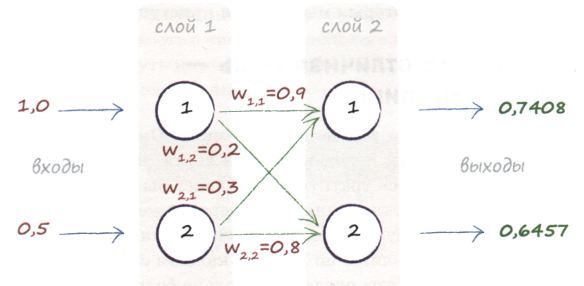

In [1]:
import numpy as np
s = lambda x: 1/(1+np.power(np.e, -x)) # sigmoid
x1 = 1.0
x2 = 0.5
w11 = 0.9
w12 = 0.2
w21 = 0.3
w22 = 0.8

In [ ]:
# code 1
#(0.7407748991821539, 0.6456563062257954)

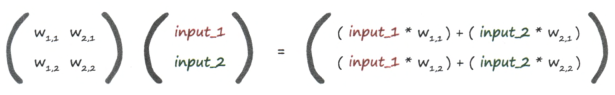

In [3]:
w = np.array([[w11, w21],[w12, w22]])
i = np.array([x1, x2])

In [ ]:
# code 2
#array([0.7407749 , 0.64565631])

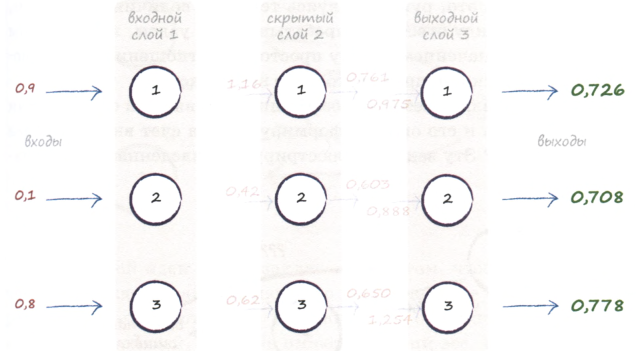

In [5]:
w1 = np.array([[0.9, 0.3, 0.4],[0.2, 0.8, 0.2],[0.1, 0.5, 0.6]])
w2 = np.array([[0.3, 0.7, 0.5],[0.6, 0.5, 0.2],[0.8, 0.1, 0.9]])
i = np.array([0.9, 0.1, 0.8])

In [ ]:
# code 3
#array([0.72630335, 0.70859807, 0.77809706])

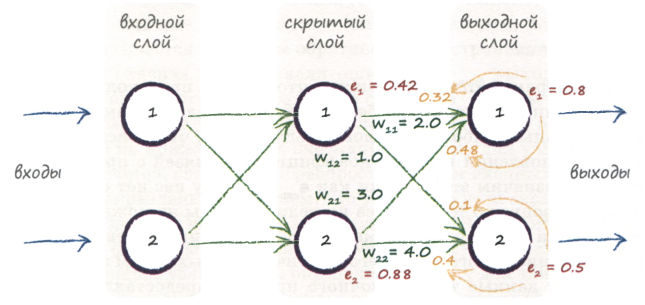

In [ ]:
w11 = 2.0
w12 = 1.0
w21 = 3.0
w22 = 4.0
e1 = 0.8
e2 = 0.5

In [ ]:
# code 4
#(0.42000000000000004, 0.88)

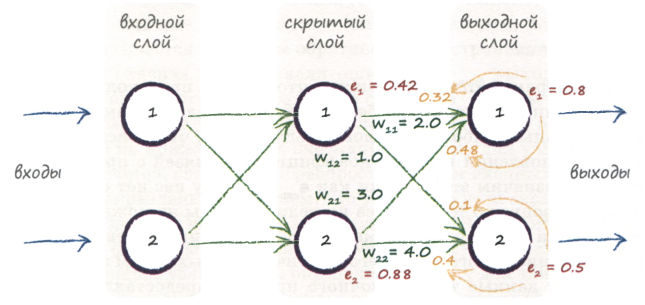

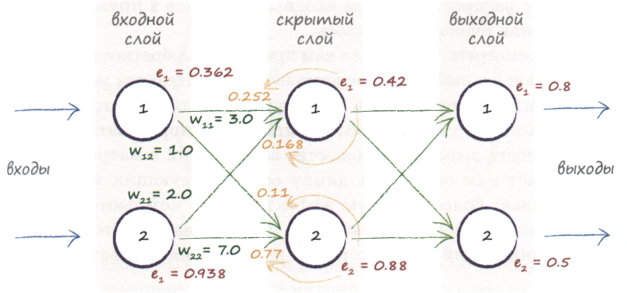

In [9]:
w11 = 3.0
w12 = 1.0
w21 = 2.0
w22 = 7.0
e1 = 0.42
e2 = 0.88

In [ ]:
# code 5
#(0.362, 0.9380000000000001)

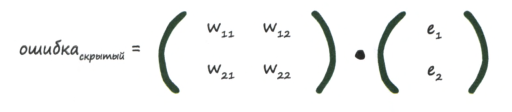

In [11]:
w = np.array([[w11, w21],[w12, w22]])
e = np.array([e1, e2])

In [ ]:
# code 6
#array([2.14, 7.  ])

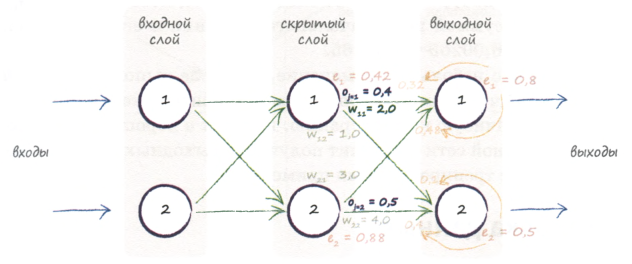

In [13]:
o1 = 0.4
o2 = 0.5
w11 = 2.0
w12 = 1.0
w21 = 3.0
w22 = 4.0
e1 = 0.8
e2 = 0.5
a = 0.1

In [ ]:
# code 7
#0.9088770389851438
#0.08281956699074118
#0.002650226143703718
#2.002650226143704

In [15]:
w = np.array([[w11, w21],[w12, w22]])
e = np.array([e1, e2])
o = np.array([o1, o2])
a = 0.1
w@o

array([2.3, 2.4])

In [ ]:
# code 8
#array([2.3, 2.4])
#array([0.90887704, 0.9168273 ])
#array([0.08281957, 0.076255  ])
#array([0.06625565, 0.0381275 ])
#array([0.02650226, 0.01906375])
#array([0.00265023, 0.00190637])
#array([[2.00265023, 3.00190637],
#       [1.00265023, 4.00190637]])

In [ ]:
w = np.array([[w11, w21],[w12, w22]])
e = np.array([e1, e2])
o = np.array([o1, o2])
a = 0.1

epochs = 5
for epoch in range(epochs):
  w = ...
w

Ellipsis

In [ ]:
import numpy as np
from scipy.special import expit as sigmoid
from dataclasses import dataclass
norm = np.random.normal

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

iris = load_iris()
X, y = iris['data'], iris['target']
X = MinMaxScaler(feature_range=(0.01, 0.99)).fit_transform(X)
y = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()
y = MinMaxScaler(feature_range=(0.01, 0.99)).fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

@dataclass
class NeuralNetwork:
  inp: ... # input  nodes
  hid: ... # hidden nodes
  out: ... # output nodes
  lr:  ... # learning rate
  act: ... # activation function
  epo: ... # epochs

  def __post_init__(s): # generate weights
    s.wih = norm(0., np.sqrt(s.inp), (s.hid, s.inp))
    s.who = norm(0., np.sqrt(s.hid), (s.out, s.hid))

  def train(s, x, y):
    x = np.array(x, ndmin=2).T
    y = np.array(y, ndmin=2).T

    ho = s.act(s.wih @ x)  # hidden outputs
    fo = s.act(s.who @ ho) # final  outputs
    oe = y - fo            # output errors
    he = s.who.T @ oe      # hidden errors
    s.who += s.lr * (oe * fo * (1. - fo)) @ ho.T
    s.wih += s.lr * (he * ho * (1. - ho)) @ x.T

  def query(s, x):
    x = np.array(x, ndmin=2).T
    return s.act(s.who @ s.act(s.wih @ x))

  def fit(s, X, y):
    for e in range(s.epo):
      for i in range(len(y)):
        s.train(X[i], y[i])

  def predict(s, X):
    return np.array([np.argmax(s.query(x)) for x in X])

  def score(s, X, y):
    y = np.array([np.argmax(i) for i in y])
    return (s.predict(X) == y).mean()

nn = NeuralNetwork(X.shape[1], 10, y.shape[1], 0.1, sigmoid, 50)
nn.fit(X_train, y_train)
nn.score(X_test, y_test)

0.9473684210526315

In [18]:
# code 9
#array([[2.01320765, 3.00949999],
#       [1.01320765, 4.00949999]])

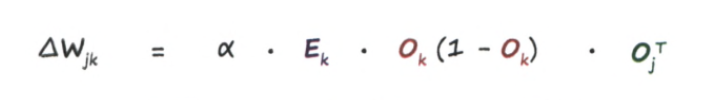

In [ ]:
import numpy as np
s = lambda x: 1/(1+np.power(np.e, -x)) # sigmoid
w = np.array([[2.0, 3.0],[1.0, 4.0]])  # weights
a = 0.1                                # learning rate

X = np.array([[0.9, 0.1], [0.2, 0.8]]) # input  data
Y = np.array([[1.0, 0.0], [0.0, 1.0]]) # output data

#   X      y
#[.9 .1] [1 0]
#[.2 .8] [0 1]

epochs = 500
for epoch in range(epochs):
  for i in range(len(Y)):
    x, y = X[i], Y[i]
    o =  ...    # outputs
    e = y - o   # output errors
    d =  ...    # delta
    g = X.T @ d # gradient
    w += a*g    # updating weights
print(w)

TypeError: unsupported operand type(s) for -: 'float' and 'ellipsis'

In [ ]:
# code 10
#[[-0.25153713  0.4766766 ]
# [-1.25153713  1.4766766 ]]

In [ ]:
def query(x):
  return ...

def predict(x):
  return np.argmax(query(x))

def score(X, y):
  return ...

X_test = np.array([[1.0, 0.0], [0.7, 0.2], [0.5, 0.5], [0.2, 0.7], [0.0, 1.0]])
y_test = np.array([0, 0, 1, 1, 1])
score(X_test, y_test)

In [ ]:
# code 11
#np.float64(0.8)

In [ ]:
import numpy as np
from scipy.special import expit as sigmoid
from dataclasses import dataclass
norm = np.random.normal

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

iris = load_iris()
X, y = iris['data'], iris['target']
X = MinMaxScaler(feature_range=(0.01, 0.99)).fit_transform(X)
y = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()
y = MinMaxScaler(feature_range=(0.01, 0.99)).fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

@dataclass
class NeuralNetwork:
  inp: ... # input  nodes
  hid: ... # hidden nodes
  out: ... # output nodes
  lr:  ... # learning rate
  act: ... # activation function
  epo: ... # epochs

  def __post_init__(s): # generate weights
    s.wih = norm(0., np.sqrt(s.inp), (s.hid, s.inp))
    s.who = norm(0., np.sqrt(s.hid), (s.out, s.hid))

  def train(s, x, y):
    x = np.array(x, ndmin=2).T
    y = np.array(y, ndmin=2).T

    ho = s.act(s.wih @ x)  # hidden outputs
    fo = s.act(s.who @ ho) # final  outputs
    oe = y - fo            # output errors
    he = s.who.T @ oe      # hidden errors
    s.who += s.lr * (oe * fo * (1. - fo)) @ ho.T
    s.wih += s.lr * (he * ho * (1. - ho)) @ x.T

  def query(s, x):
    x = np.array(x, ndmin=2).T
    return s.act(s.who @ s.act(s.wih @ x))

  def fit(s, X, y):
    for e in range(s.epo):
      for i in range(len(y)):
        s.train(X[i], y[i])

  def predict(s, X):
    return np.array([np.argmax(s.query(x)) for x in X])

  def score(s, X, y):
    y = np.array([np.argmax(i) for i in y])
    return (s.predict(X) == y).mean()

nn = NeuralNetwork(X.shape[1], 10, y.shape[1], 0.1, sigmoid, 50)
nn.fit(X_train, y_train)
nn.score(X_test, y_test)

0.9473684210526315

In [ ]:
# code 12
# Меняйте learning rate и hidden nodes
# Постройте график по полученным данным

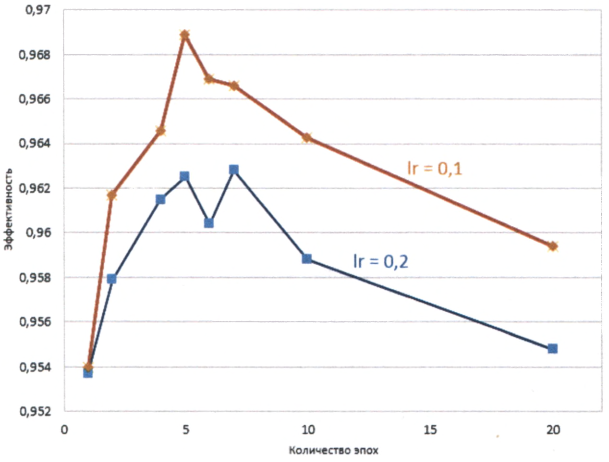

In [ ]:
# code 13
# Постройте подобный график

In [ ]:
import numpy as np
from scipy.special import expit as sigmoid
from scipy.special import logit
from dataclasses import dataclass
from tqdm import tqdm
norm = np.random.normal

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1)
X_test  = X_test.reshape(X_test.shape[0],   -1)
X_train = (X_train.astype("float32") / 255.0 * 0.98) + 0.01
X_test  = (X_test.astype("float32")  / 255.0 * 0.98) + 0.01
y_train = OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).toarray()
y_test  = OneHotEncoder().fit_transform(y_test.reshape(-1, 1) ).toarray()
y_train = MinMaxScaler(feature_range=(0.01, 0.99)).fit_transform(y_train)
y_test  = MinMaxScaler(feature_range=(0.01, 0.99)).fit_transform(y_test )


@dataclass
class NeuralNetwork:
  inp: ... # input  nodes
  hid: ... # hidden nodes
  out: ... # output nodes
  lr:  ... # learning rate
  act: ... # activation function
  inv: ... # inverse activation function
  epo: ... # epochs

  def __post_init__(s): # generate weights
    s.wih = norm(0., np.sqrt(1/s.inp), (s.hid, s.inp))
    s.who = norm(0., np.sqrt(1/s.hid), (s.out, s.hid))

  def train(s, x, y):
    x = np.array(x, ndmin=2).T
    y = np.array(y, ndmin=2).T

    ho = s.act(s.wih @ x)  # hidden outputs
    fo = s.act(s.who @ ho) # final  outputs
    oe = y - fo            # output errors
    he = s.who.T @ oe      # hidden errors
    s.who += s.lr * (oe * fo * (1. - fo)) @ ho.T
    s.wih += s.lr * (he * ho * (1. - ho)) @ x.T

  def query(s, x):
    x = np.array(x, ndmin=2).T
    return s.act(s.who @ s.act(s.wih @ x))

  def backquery(s, y):
    # code
    return ...

  def fit(s, X, y):
    for e in tqdm(range(s.epo)):
      for i in range(len(y)):
        s.train(X[i], y[i])

  def predict(s, X):
    return np.array([np.argmax(s.query(x)) for x in X])

  def score(s, X, y):
    y = np.array([np.argmax(i) for i in y])
    return (s.predict(X) == y).mean()

nn = NeuralNetwork(X_train.shape[1], 200, y_train.shape[1], 0.1, sigmoid, logit, 5)#200 5
nn.fit(X_train, y_train)
print(nn.score(X_test, y_test))

In [ ]:
# code 14
# Напишите метод backquery (mnist_back.ipynb)
# code 15
# Покажите какие картинки получились на входе

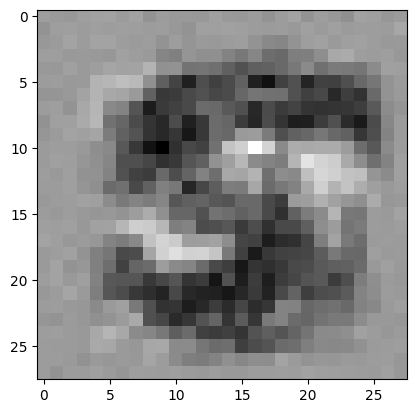